In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
df=sns.load_dataset("tips")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
df.rename({'sex':'Gender'},axis=1,inplace=True)

In [5]:
df.isnull().sum()

total_bill    0
tip           0
Gender        0
smoker        0
day           0
time          0
size          0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [8]:
df['smoker']=lb.fit_transform(df['smoker'])
df['Gender']=lb.fit_transform(df['Gender'])
df['time']=lb.fit_transform(df['time'])
df['day']=lb.fit_transform(df['day'])

In [9]:
df.dtypes

total_bill    float64
tip           float64
Gender          int32
smoker          int32
day             int32
time            int32
size            int64
dtype: object

In [10]:
df.corr()

,total_bill,tip,Gender,smoker,day,time,size
total_bill,1.000000,0.675734,0.144877,0.085721,-0.043550,-0.183118,0.598315
tip,0.675734,1.000000,0.088862,0.005929,-0.011548,-0.121629,0.489299
Gender,0.144877,0.088862,1.000000,0.002816,-0.078292,-0.205231,0.086195
smoker,0.085721,0.005929,0.002816,1.000000,-0.282721,-0.054921,-0.133178
day,-0.043550,-0.011548,-0.078292,-0.282721,1.000000,0.638019,0.069510
time,-0.183118,-0.121629,-0.205231,-0.054921,0.638019,1.000000,-0.103411
size,0.598315,0.489299,0.086195,-0.133178,0.069510,-0.103411,1.000000


In [14]:
import matplotlib.pyplot as plt

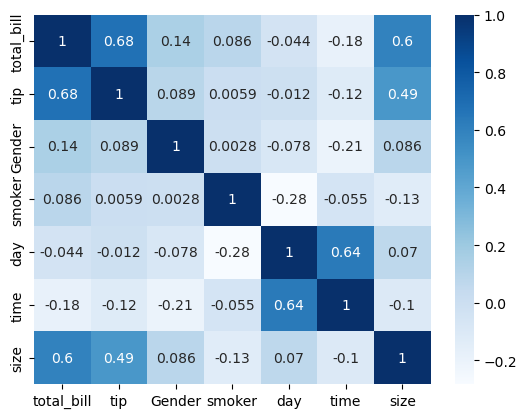

In [15]:
sns.heatmap(df.corr(),cmap='Blues',annot=True)
plt.show()

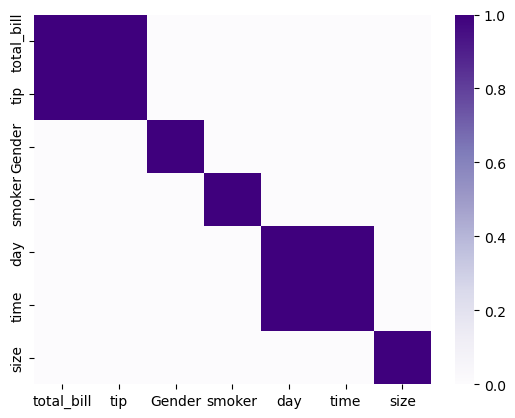

In [17]:
sns.heatmap(np.abs(df.corr())>0.6,cmap='Purples')
plt.show()

In [ ]:
#Scaling techniques
#1) standardization ---> mean 0 and std of 1
#2)Normalization ---> range of 0 to 1 inclusive

In [18]:
df.describe()

,total_bill,tip,Gender,smoker,day,time,size
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,0.643443,0.381148,1.741803,0.278689,2.569672
std,8.902412,1.383638,0.479967,0.486667,0.926815,0.449276,0.951100
min,3.070000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.347500,2.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,17.795000,2.900000,1.000000,0.000000,2.000000,0.000000,2.000000
75%,24.127500,3.562500,1.000000,1.000000,3.000000,1.000000,3.000000
max,50.810000,10.000000,1.000000,1.000000,3.000000,1.000000,6.000000


In [20]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [23]:
scaler.fit_transform(df)

array([[-3.14711305e-01, -1.43994695e+00, -1.34335316e+00, ...,
         2.79157595e-01, -6.21581561e-01, -6.00192629e-01],
       [-1.06323531e+00, -9.69205340e-01,  7.44405889e-01, ...,
         2.79157595e-01, -6.21581561e-01,  4.53382921e-01],
       [ 1.37779900e-01,  3.63355539e-01,  7.44405889e-01, ...,
         2.79157595e-01, -6.21581561e-01,  4.53382921e-01],
       ...,
       [ 3.24629502e-01, -7.22971264e-01,  7.44405889e-01, ...,
        -8.02024201e-01, -6.21581561e-01, -6.00192629e-01],
       [-2.21286504e-01, -9.04025732e-01,  7.44405889e-01, ...,
        -8.02024201e-01, -6.21581561e-01, -6.00192629e-01],
       [-1.13228903e-01,  1.24660453e-03, -1.34335316e+00, ...,
         1.36033939e+00, -6.21581561e-01, -6.00192629e-01]])

In [25]:
scale_array=scaler.fit_transform(df)

In [26]:
scale_array.shape

(244, 7)

In [27]:
scale_df=pd.DataFrame(scale_array,columns=df.columns)
scale_df

,total_bill,tip,Gender,smoker,day,time,size
0,-0.314711,-1.439947,-1.343353,-0.784789,0.279158,-0.621582,-0.600193
1,-1.063235,-0.969205,0.744406,-0.784789,0.279158,-0.621582,0.453383
2,0.137780,0.363356,0.744406,-0.784789,0.279158,-0.621582,0.453383
3,0.438315,0.225754,0.744406,-0.784789,0.279158,-0.621582,-0.600193
4,0.540745,0.443020,-1.343353,-0.784789,0.279158,-0.621582,1.506958
...,...,...,...,...,...,...,...
239,1.040511,2.115963,0.744406,-0.784789,-0.802024,-0.621582,0.453383
240,0.832275,-0.722971,-1.343353,1.274228,-0.802024,-0.621582,-0.600193
241,0.324630,-0.722971,0.744406,1.274228,-0.802024,-0.621582,-0.600193
242,-0.221287,-0.904026,0.744406,-0.784789,-0.802024,-0.621582,-0.600193
